# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

### Carga de datos y análisis general

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data =pd.DataFrame(pd.read_csv("processed.cleveland.data", sep= ',', names=col_names))
print("Información general del dataset:")
print(data.info())
print("")
print(f"La matriz tiene una dimensión de: {data.shape}")
print(f"Se tienen los tipos de datos: {data.dtypes.unique().tolist()}")

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None

La matriz tiene una dimensión de: (303, 14)
Se tienen los tipos de datos: [dtype('float64'), dtype('O'), dtype('int64')]


### Distribución y estadísticas generales del dataset

In [51]:
print("Distribución y composición del dataset:")
print(data.describe())

Distribución y composición del dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0

In [52]:
print("Primeras líneas:")
print(data.head())

Primeras líneas:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


### Tipo de variables

In [53]:
def getDateColTypes (df):
    categoricas=[]
    continuas=[]
    discretas=[]

    for colName in df.columns:
        if(df[colName].dtype=='object'):
            categoricas.append(colName)
        else:
            if((df[colName].dtype=='int64')or (df[colName].dtype=='float64')or (df[colName].dtype=='uint8')):
                if (len(df[colName].unique())<=30):
                    discretas.append(colName)
                else:
                    continuas.append(colName)
    return categoricas, continuas, discretas

categoricas, continuas, discretas=getDateColTypes(data)

tipos_var = {"Categoricas":categoricas, "Contínuas": continuas, "Discretas":discretas}

In [54]:
for i, lista in tipos_var.items():
    tipos = ", ".join(map(str, lista)) if lista else "No hay"
    print(f"Las variables {i}: {tipos}")

Las variables Categoricas: ca, thal
Las variables Contínuas: age, trestbps, chol, thalach, oldpeak
Las variables Discretas: sex, cp, fbs, restecg, exang, slope, num


### Validación variables con nulos

In [55]:
cols_Nan=[col for col in data.columns if(data[col].isnull().mean()>0)]
cols_Nan

[]

Debido a que no se tienen variables con nulos, se procede a realizar análisis de las variables imputadas con el caracter ?

Se convierten las variables a numéricos y se determina la cantidad de datos faltantes para determinar su tratamiento

In [56]:
data_back = data.copy()

In [57]:
# Se copian las columnas como NaN 
data["ca_na"]= pd.to_numeric(data['ca'], errors='coerce')
data["thal_na"]= pd.to_numeric(data['thal'], errors='coerce')

# Se obtiene el porcentaje de datos con NaN
media=round(data['ca_na'].isnull().mean()*100,2)
print(f'Para la variable ca_na, se tiene {media = } % valores nulos')
media=round(data['thal_na'].isnull().mean()*100,2)
print(f'Para la variable thal_na, se tiene {media = } % valores nulos')

Para la variable ca_na, se tiene media = 1.32 % valores nulos
Para la variable thal_na, se tiene media = 0.66 % valores nulos


In [58]:
print(data[['ca_na','thal_na']].describe())
media=round(data['ca_na'].mean(),0)
mediana=round(data['ca_na'].median(),0)

            ca_na     thal_na
count  299.000000  301.000000
mean     0.672241    4.734219
std      0.937438    1.939706
min      0.000000    3.000000
25%      0.000000    3.000000
50%      0.000000    3.000000
75%      1.000000    7.000000
max      3.000000    7.000000


In [59]:
# Se crean las columnas de Media y Mediana
data['ca_mean']=data['ca_na'].fillna(media)
data['ca_median']=data['ca_na'].fillna(mediana)

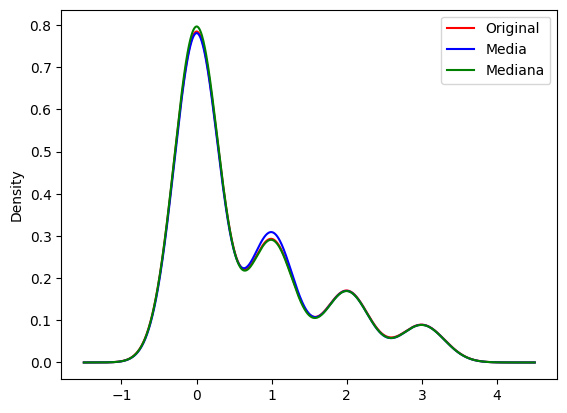

In [60]:
# Representación gráfica
fig=plt.figure()
ax=fig.add_subplot(111)

data['ca_na'].plot.density(color='red',label='Original')
data['ca_mean'].plot.density(color='blue',label='Media')
data['ca_median'].plot.density(color='green',label='Mediana')
ax.legend()
plt.show()


Debido al comportamiento de la variable 'ca' y 'ca_median', se utilizará la mediana

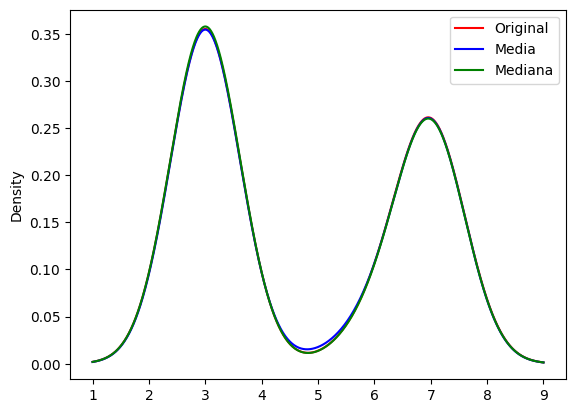

In [61]:
# Se calculan las medias para la columna 'thal_na'
media=round(data['thal_na'].mean(),0)
mediana=round(data['thal_na'].median(),0)

# Se crean las columnas de Media y Mediana
data['thal_mean']=data['thal_na'].fillna(media)
data['thal_median']=data['thal_na'].fillna(mediana)

# Representación gráfica
fig=plt.figure()
ax=fig.add_subplot(111)

data['thal_na'].plot.density(color='red',label='Original')
data['thal_mean'].plot.density(color='blue',label='Media')
data['thal_median'].plot.density(color='green',label='Mediana')
ax.legend()
plt.show()

Debido al comportamiento de 'thal' y 'thal_median', se utilizará la mediana

In [62]:
data['ca'] = data['ca_median']
data['thal'] = data['thal_median']

In [63]:
#Se proceden a eliminar las columnas que no se utilizarán.
data.drop(['ca_na', 'ca_mean', 'ca_median', 'thal_na', 'thal_mean', 'thal_median'], axis=1, inplace=True)

Se procede a correr nuevamente el análisis de tipo de variable

In [64]:
categoricas, continuas, discretas=getDateColTypes(data)

tipos_var = {"Categoricas":categoricas, "Contínuas": continuas, "Discretas":discretas}
for i, lista in tipos_var.items():
    tipos = ", ".join(map(str, lista)) if lista else "No hay"
    print(f"Las variables {i}: {tipos}")

Las variables Categoricas: No hay
Las variables Contínuas: age, trestbps, chol, thalach, oldpeak
Las variables Discretas: sex, cp, fbs, restecg, exang, slope, ca, thal, num


### Transformación de variables

In [65]:
# Variables discretas
data[discretas].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.679868,3.158416,0.148515,0.990099,0.326733,1.600660,0.663366,4.722772,0.937294
std,0.467299,0.960126,0.356198,0.994971,0.469794,0.616226,0.934375,1.938383,1.228536
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,1.000000,7.000000,2.000000
max,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,3.000000,7.000000,4.000000


In [66]:
# Variables Contínuas
data[continuas].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [67]:
# Buscar normalidad de las variables continuas de forma grafica

def plot_density_qq(dataset,col):
    '''Esta funcion muestra la grafica de densidad y el plot QQ para verificar normalidad'''
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    dataset[col].hist(bins=30)

    plt.subplot(1,2,2)
    stats.probplot(dataset[col],dist='norm',plot=plt)

    plt.show()

age


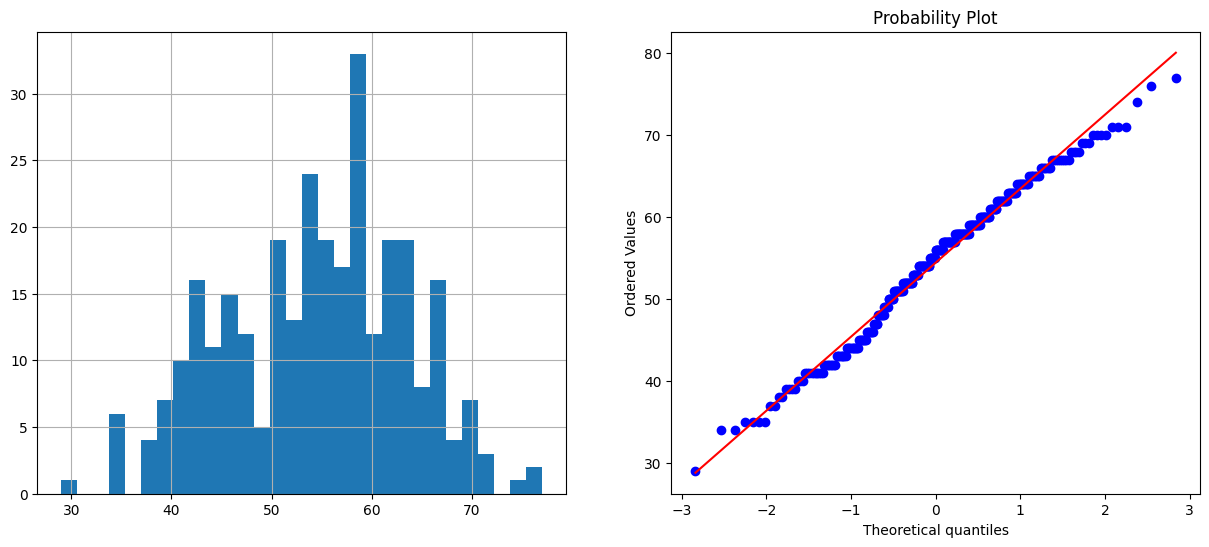

trestbps


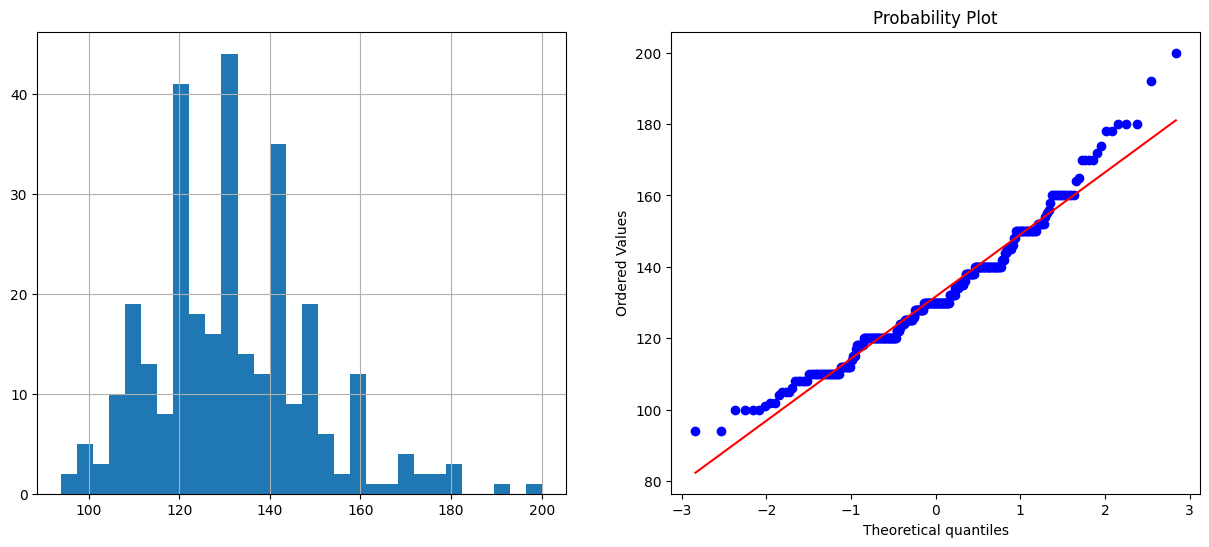

chol


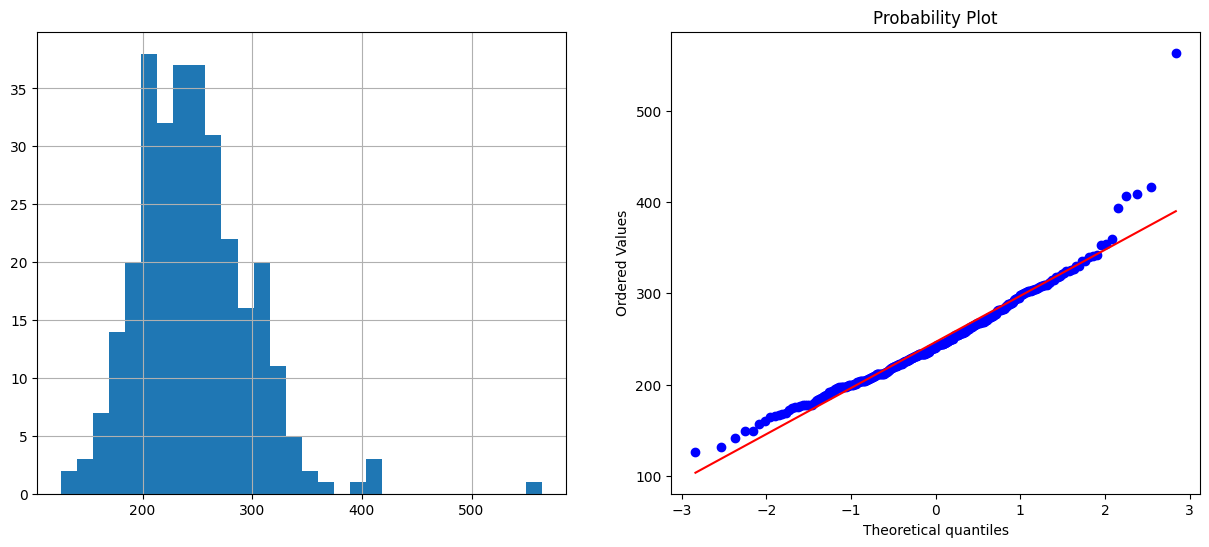

thalach


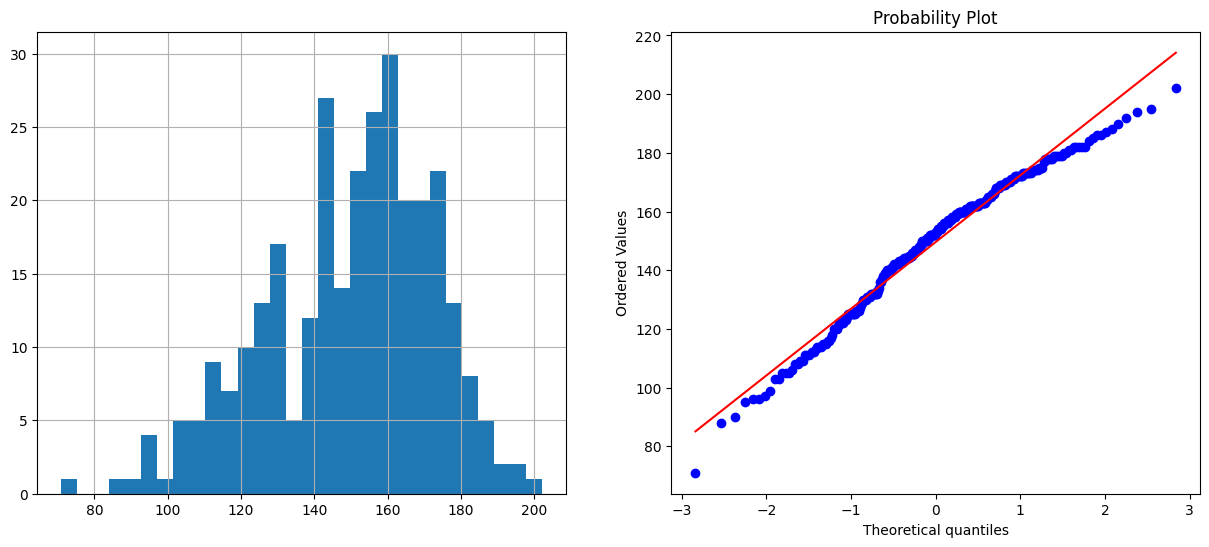

oldpeak


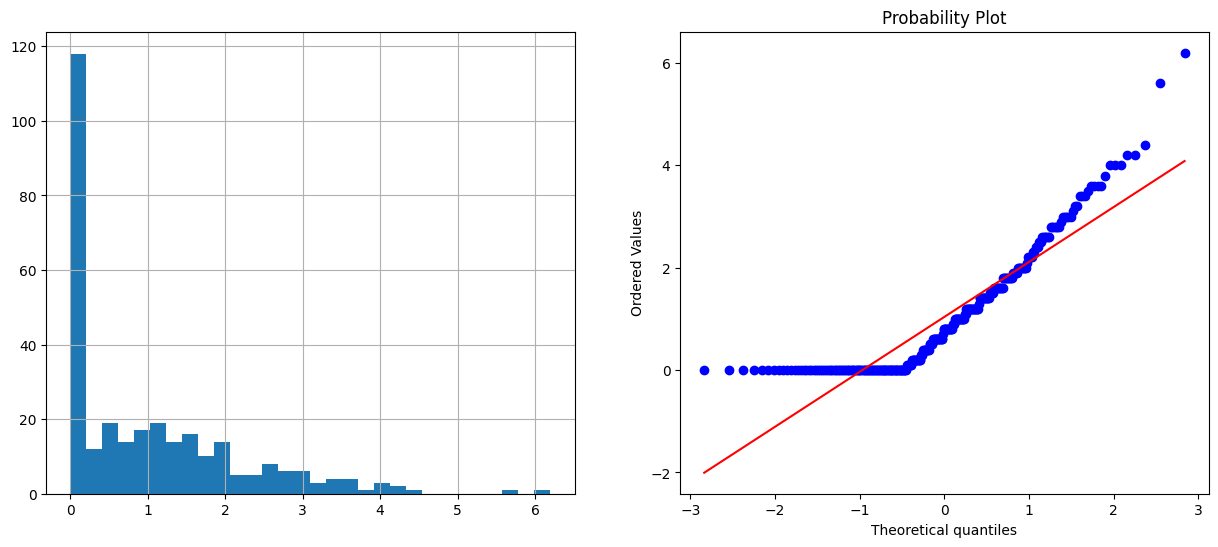

In [68]:
for col in continuas:
    print(col)
    plot_density_qq(data,col)

In [69]:
# Buscar la normalidad de las variables continuas con Shapiro, se crea la función
def shapiro_test(data_frame, columnas):
    #from scipy import stats
    for col in columnas:
        shapiro_test=stats.shapiro(data_frame[col])
        print(f'Columna: {col}')
        print(f'Estadística de prueba: {round(shapiro_test.statistic,3)}')
        print(f'P_value: {round(shapiro_test.pvalue, 3)}')
        if (shapiro_test.pvalue <0.05):
            print(f'{col}: Tiene distribución Normal')
        else:
            print(f'{col}: No es Normal')
        print("-----")

In [70]:
shapiro_test(data,continuas)

Columna: age
Estadística de prueba: 0.986
P_value: 0.006
age: Tiene distribución Normal
-----
Columna: trestbps
Estadística de prueba: 0.967
P_value: 0.0
trestbps: Tiene distribución Normal
-----
Columna: chol
Estadística de prueba: 0.947
P_value: 0.0
chol: Tiene distribución Normal
-----
Columna: thalach
Estadística de prueba: 0.976
P_value: 0.0
thalach: Tiene distribución Normal
-----
Columna: oldpeak
Estadística de prueba: 0.844
P_value: 0.0
oldpeak: Tiene distribución Normal
-----


In [71]:
# Se crea una función para estandarizar un dataframe con columnas espefícas
def std_data(dataframe, columnas):
    #from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    for col in columnas:
        col_data = dataframe[col].values.reshape(-1,1)
        col_std = scaler.fit_transform(col_data)
        dataframe[col]= col_std

std_data(data,continuas)

print(data[continuas])

          age  trestbps      chol   thalach   oldpeak
0    0.948726  0.757525 -0.264900  0.017197  1.087338
1    1.392002  1.611220  0.760415 -1.821905  0.397182
2    1.392002 -0.665300 -0.342283 -0.902354  1.346147
3   -1.932564 -0.096170  0.063974  1.637359  2.122573
4   -1.489288 -0.096170 -0.825922  0.980537  0.310912
..        ...       ...       ...       ...       ...
298 -1.046013 -1.234430  0.334813 -0.770990  0.138373
299  1.502821  0.700612 -1.038723 -0.376896  2.036303
300  0.283813 -0.096170 -2.238149 -1.515388  0.138373
301  0.283813 -0.096170 -0.206864  1.068113 -0.896862
302 -1.821745  0.359134 -1.386944  1.024325 -0.896862

[303 rows x 5 columns]


age


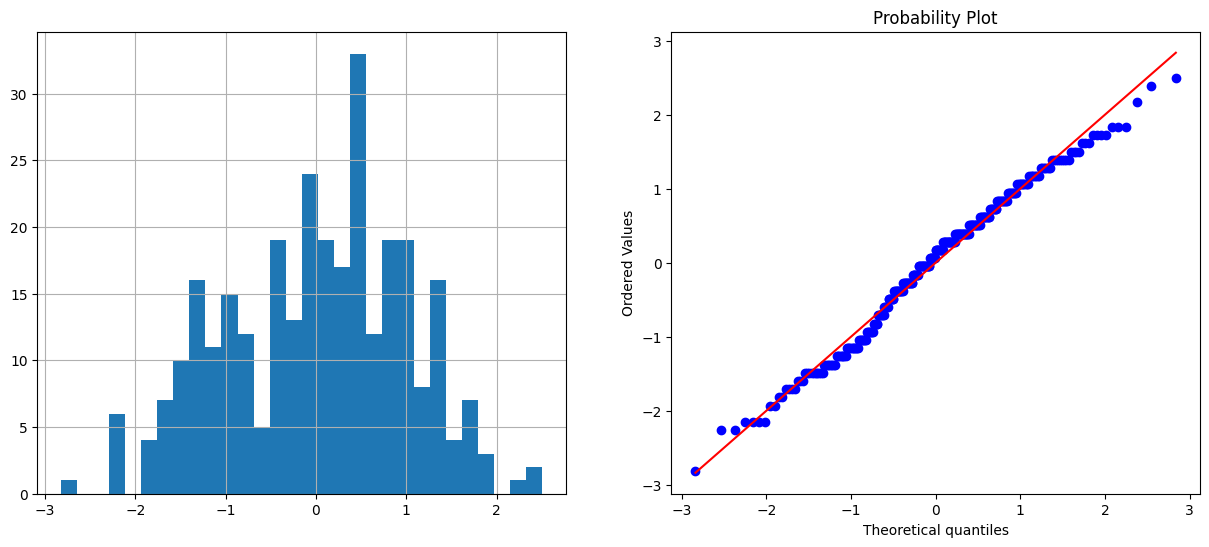

trestbps


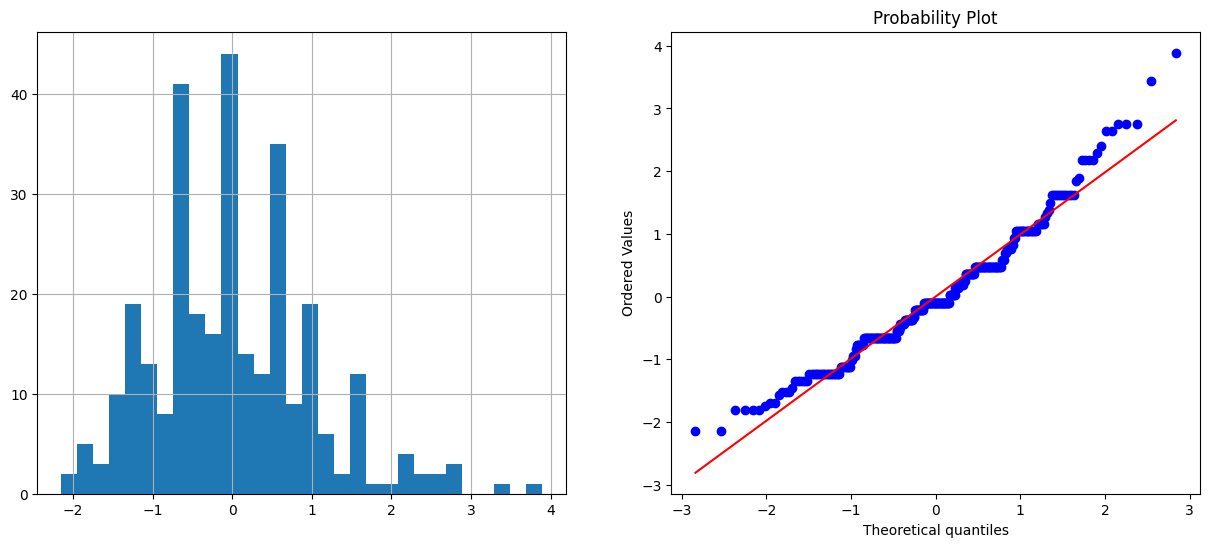

chol


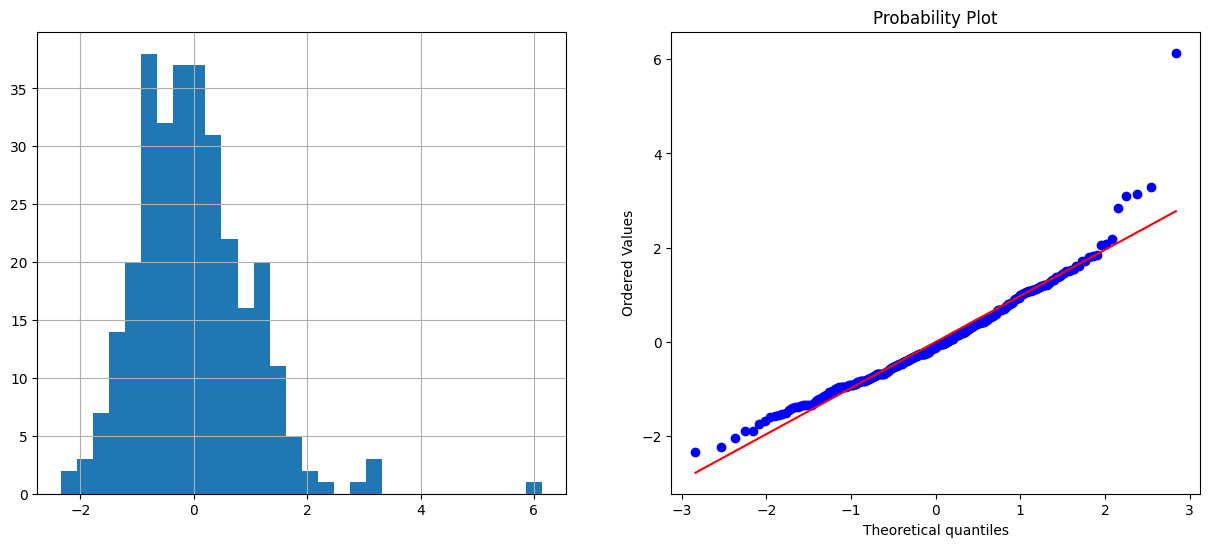

thalach


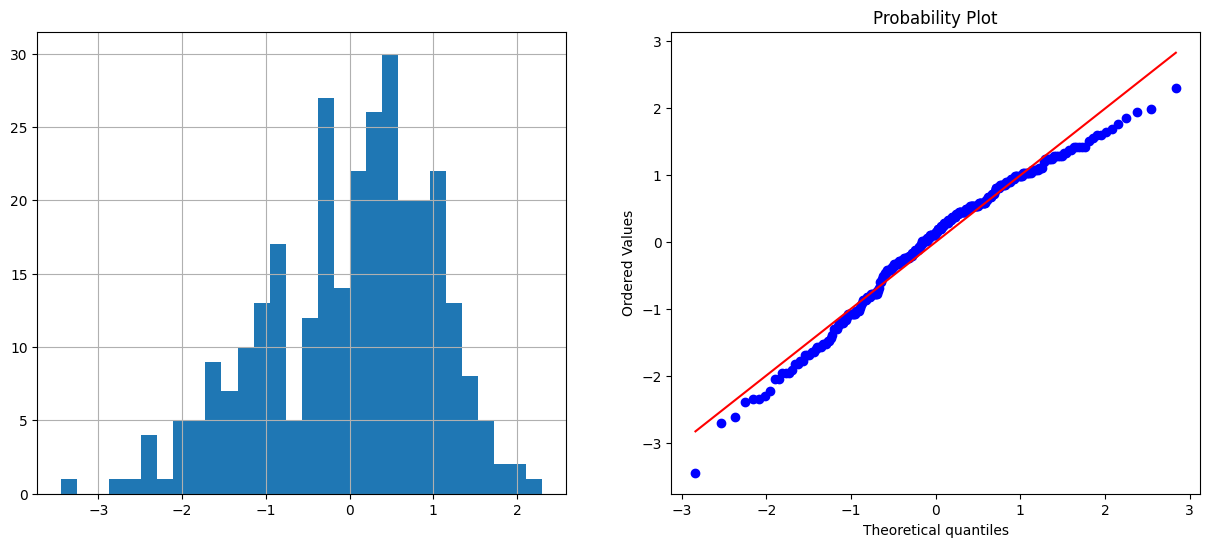

oldpeak


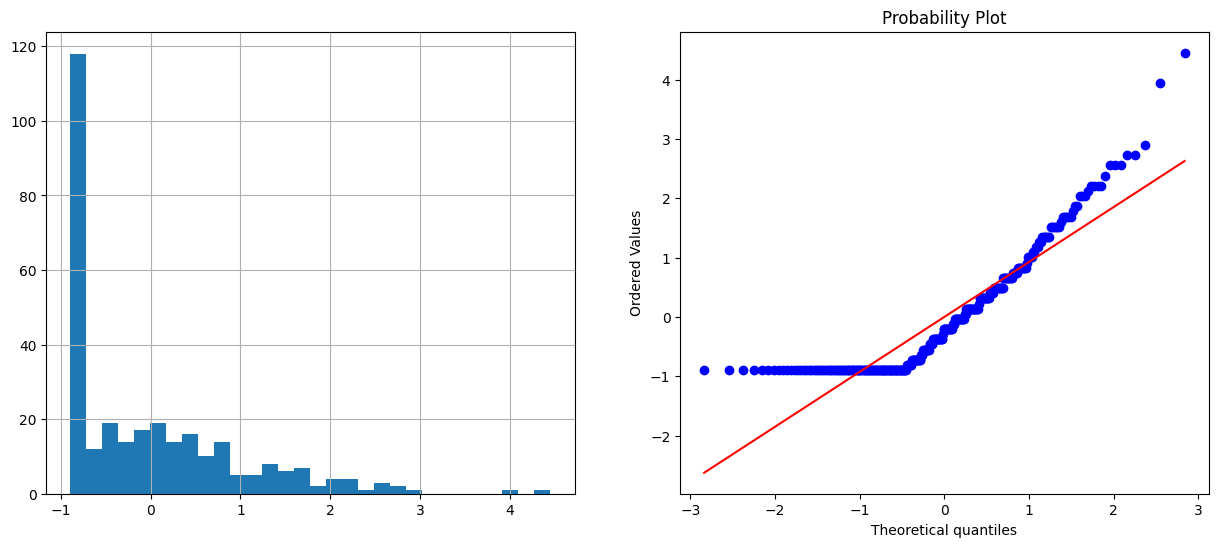

In [72]:
for col in continuas:
    print(col)
    plot_density_qq(data,col)

In [73]:
#Se realiza nuevamente la prueba de Shapiro para confirmar la estandarización
shapiro_test(data, continuas)

Columna: age
Estadística de prueba: 0.986
P_value: 0.006
age: Tiene distribución Normal
-----
Columna: trestbps
Estadística de prueba: 0.967
P_value: 0.0
trestbps: Tiene distribución Normal
-----
Columna: chol
Estadística de prueba: 0.947
P_value: 0.0
chol: Tiene distribución Normal
-----
Columna: thalach
Estadística de prueba: 0.976
P_value: 0.0
thalach: Tiene distribución Normal
-----
Columna: oldpeak
Estadística de prueba: 0.844
P_value: 0.0
oldpeak: Tiene distribución Normal
-----


### División de dataset en entrenamiento y prueba

In [74]:
col_test=col_names.copy()
col_test.remove('num')
print(col_test)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [93]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(col_test, axis=1), data['num'],test_size=0.2, random_state=35)

## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [77]:
### Tu código aquí

In [78]:
### Tu descripción aquí

## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [79]:
### Tu código aquí

### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [80]:
### Tu código aquí

### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [81]:
### Tu código aquí

## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [82]:
### Tu código aquí

## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

In [83]:
### Tu código aquí

In [84]:
### Tu conclusión aquí

### Como definiste la cantidad de neuronas para tus capas ocultas?

### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

In [85]:
### Tu código aquí

In [86]:
### Tu conclusión aquí

### Cosideras necesario cambiar la cantidad de neuronas para el ejercicio sobre variabilidad en capas ocultas?

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

In [87]:
### Tu código aquí

In [88]:
### Tu conclusión aquí

### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

In [89]:
### Tu código aquí

In [90]:
### Tu conclusión aquí